# Recognizing Handwritten Digits on MNIST dataset using KNN(K-Nearest Neighbor) algorithm

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
df=pd.read_csv('mnist_train.csv')
print(df.shape)

(60000, 785)


In [3]:
print(df.columns)   #shows the index of the dataframe

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [4]:
df.head(n=10) #shows the content of the first 10 rows of the table

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# The table above contains the data of the  images  where the first column refers to the label  and the rest 784 columns represents the pixel values of a 28*28 image.                       

In [5]:
data=df.values
print(data.shape) 

(60000, 785)


In [6]:
X=data[:,1:]
Y=data[:,0]
print(X.shape,Y.shape)

split=int(0.8*X.shape[0])   # Splitting our dataset into two parts.The first 80% will be used for training the model and the rest 20% will be used to predicting the output.
print(split)

(60000, 784) (60000,)
48000


In [7]:
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]

In [8]:
print(X_train.shape,Y_train.shape)
print(Y_train)
print(X_train)
print(X_test.shape,Y_test.shape)
print(Y_test)
print(X_test)
df = pd.DataFrame(X_test)
df.to_csv('mnist_test.csv')

(48000, 784) (48000,)
[5 0 4 ... 0 1 2]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(12000, 784) (12000,)
[4 7 8 ... 5 6 8]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Visualizing training data

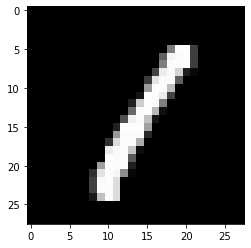

1


In [9]:
def drawImg(sample):               
    img=sample.reshape((28,28))    
    plt.imshow(img,cmap='gray')
    plt.show()
    

drawImg(X_train[3])
print(Y_train[3])

# #Implementing KNN

In [10]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def knn(X,Y,query_point,k=5 ):
    vals=[]
    m=X_train.shape[0]
    
    for i in range(m):
        d=euclidean_distance(query_point,X[i])
        vals.append((d,Y[i])) 
            
    vals=sorted(vals)
    #print(vals)
    #Nearest/First k points
    vals=vals[:k]
    
    vals=np.array(vals)
    #print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

In [11]:
X_test=X_test[:50]   # Taking the first 50 rows from X_test
Y_test=Y_test[:50]   # Taking the first 50 rows from Y_test

In [12]:
print(X_test)
print(Y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[4 7 8 8 5 6 6 8 2 2 7 8 0 4 3 4 5 2 4 2 4 8 1 0 1 0 0 1 8 2 9 3 6 6 2 7 9
 8 3 0 1 1 9 2 1 3 5 4 4 5]


# Making predictions

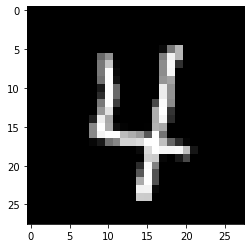

Label: 4.0


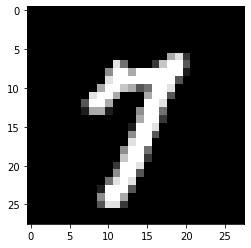

Label: 7.0


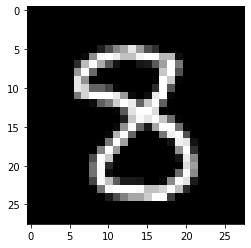

Label: 8.0


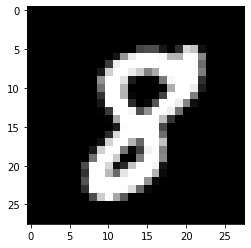

Label: 8.0


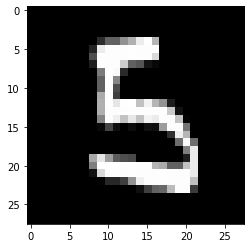

Label: 5.0


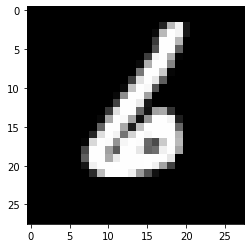

Label: 6.0


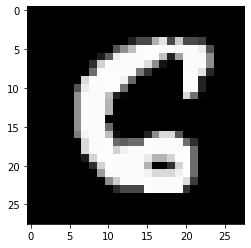

Label: 6.0


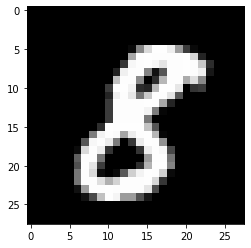

Label: 8.0


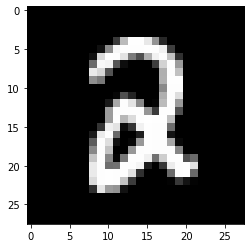

Label: 2.0


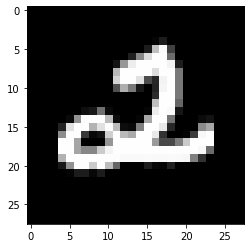

Label: 2.0


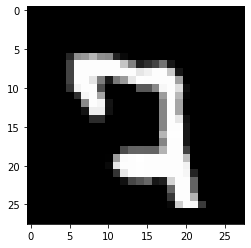

Label: 7.0


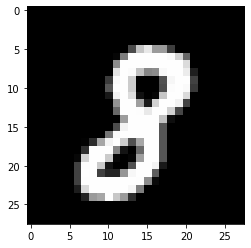

Label: 8.0


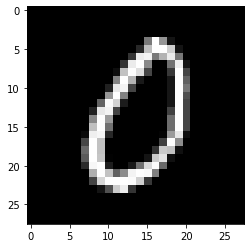

Label: 0.0


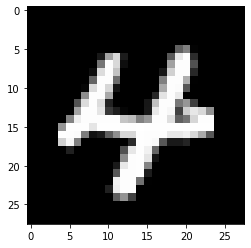

Label: 4.0


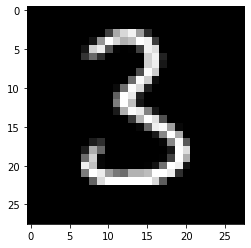

Label: 3.0


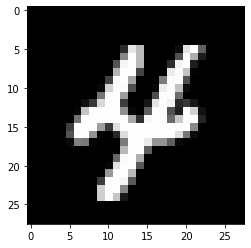

Label: 4.0


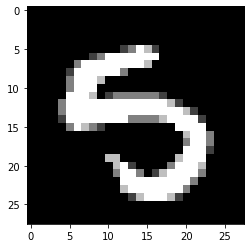

Label: 5.0


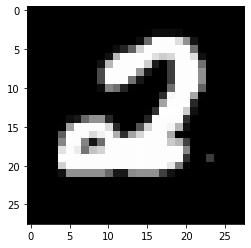

Label: 2.0


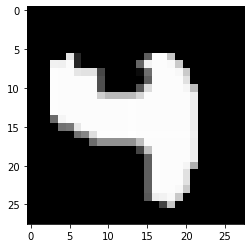

Label: 4.0


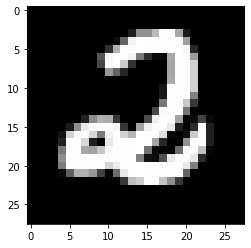

Label: 2.0


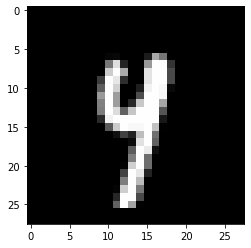

Label: 9.0


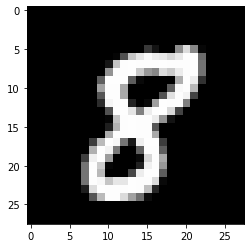

Label: 8.0


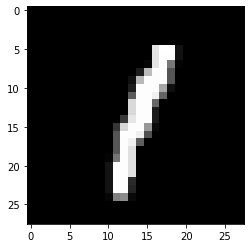

Label: 1.0


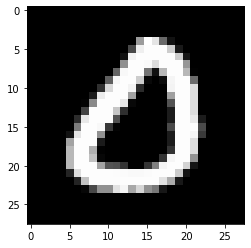

Label: 0.0


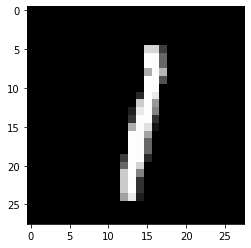

Label: 1.0


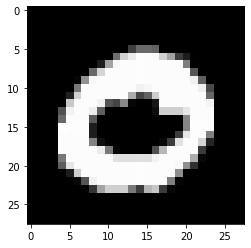

Label: 0.0


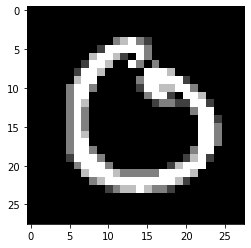

Label: 0.0


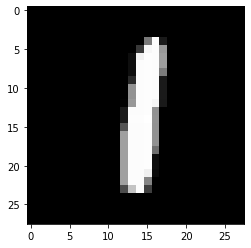

Label: 1.0


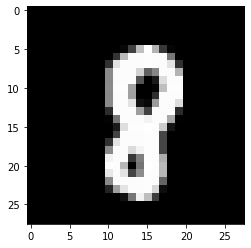

Label: 8.0


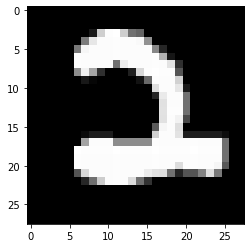

Label: 2.0


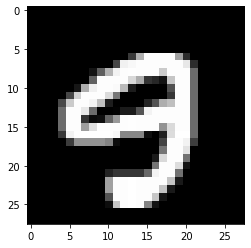

Label: 9.0


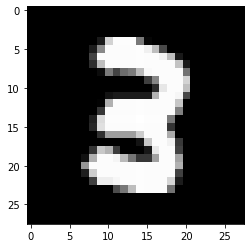

Label: 3.0


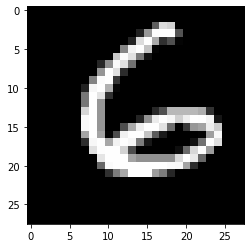

Label: 6.0


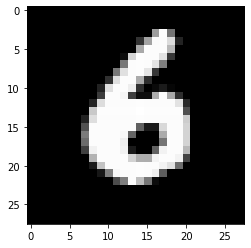

Label: 6.0


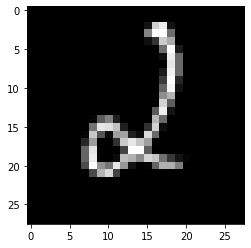

Label: 2.0


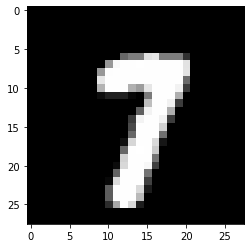

Label: 7.0


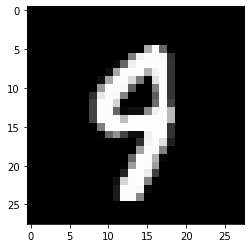

Label: 9.0


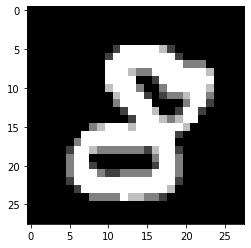

Label: 8.0


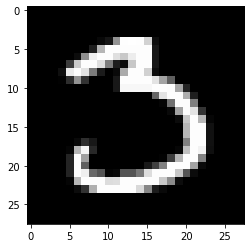

Label: 3.0


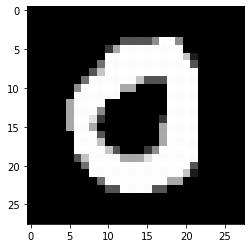

Label: 0.0


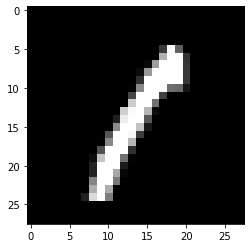

Label: 1.0


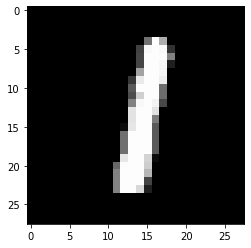

Label: 1.0


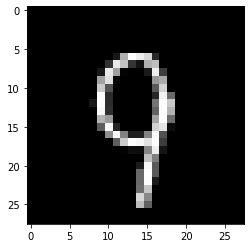

Label: 9.0


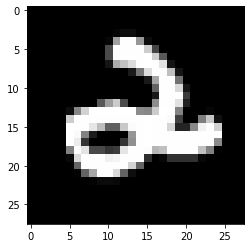

Label: 2.0


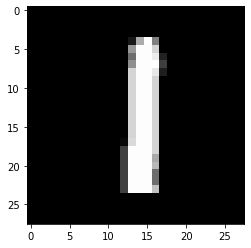

Label: 1.0


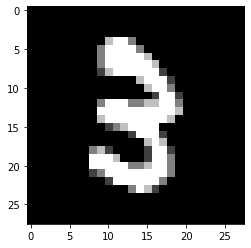

Label: 3.0


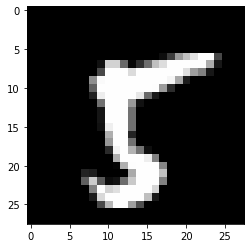

Label: 5.0


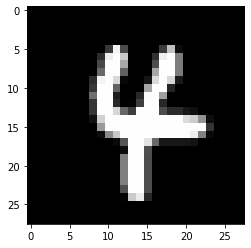

Label: 4.0


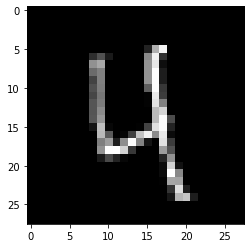

Label: 4.0


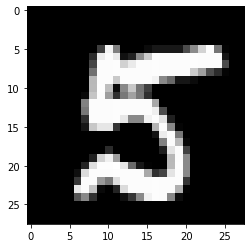

Label: 5.0


In [13]:
for test in X_test:
    drawImg(test)
    print("Label:", knn(X_train, Y_train, test))

# Finding Accuracy

In [14]:
def calculate_accuracy(X_test, Y_test, X_train, Y_train, k=5):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, Y_train, test_point)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == Y_test).sum() / Y_test.shape[0]
    return accuracy

In [15]:
accuracy=calculate_accuracy(X_test,Y_test,X_train,Y_train,5)

print(accuracy)

0.98


# So we can see our ML model predicts the output with an accuracy of 98%.